Analytical impulse to mimic CAGE electronics

In [1]:
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
plt.style.use('./joule_dissertation.mplstyle')
import cage_utils

In [2]:
def dubExpo(x, a, b, c, d):
    return (a * np.exp((b * (x))) + c * np.exp((d * (x))))

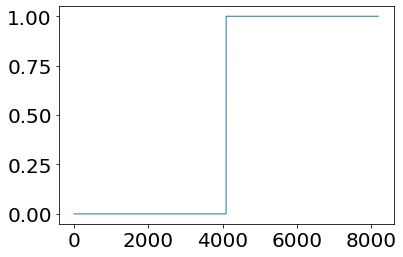

In [3]:
signal = np.repeat([0., 1.], 4096)
plt.plot(signal)

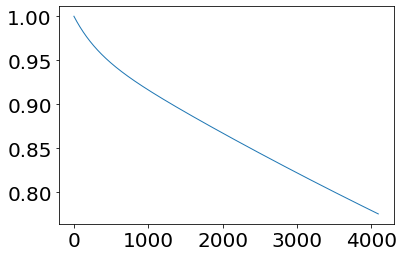

In [4]:
x = np.linspace(0, 4096, 4096)
a = 1-0.035
b = -1/18750.
c = 0.035
d = -1/317.
expo = dubExpo(x, a, b, c, d)
plt.plot(x, expo)

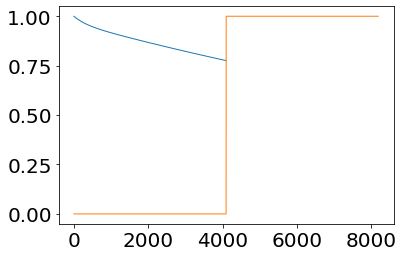

In [5]:
plt.plot(expo)
plt.plot(signal)

In [6]:
pad = np.pad(expo, (4096, 0), 'constant')
print(pad)

[0.         0.         0.         ... 0.7757122  0.77567082 0.77562944]


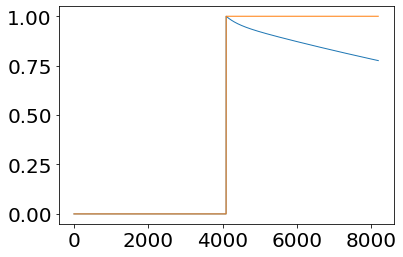

In [7]:
plt.plot(pad)
plt.plot(signal)

In [8]:
# filtered = np.convolve(signal, expo[::4])
# filtered = np.convolve(pad, signal)
# filtered = sig.convolve(signal, expo[::16], mode='same')
filtered = pad*signal

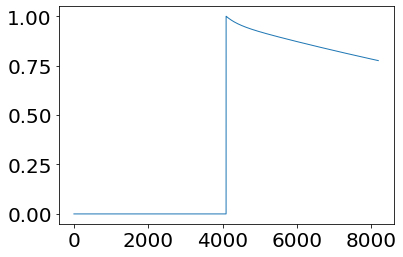

In [9]:
plt.plot(filtered)
# plt.ylim(0.8, 1.05)

In [10]:
f_superpulse = './data/normScan/run60_superpulses.hdf5'
data_superpulse = pd.read_hdf(f_superpulse, key = '/superpulses')
raw_superpulse_60 = data_superpulse['pure_60'][0]
raw_superpulse_60_notched = cage_utils.notchFilter_SIS3302(raw_superpulse_60, Q=20)

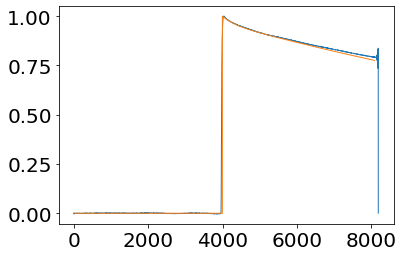

In [13]:
plt.plot(raw_superpulse_60_notched)
plt.plot(filtered[100:])
# plt.ylim(0.75, 1.05)
plt.xlim(3900, 8000)
# plt.xlim(3900, 4200)